# 1. Importing necessary files

In [64]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# 2. Importing Data

In [39]:
data = pd.read_csv('bank-full.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 3. Data Understanding

In [13]:
data.shape

(45211, 17)

In [14]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

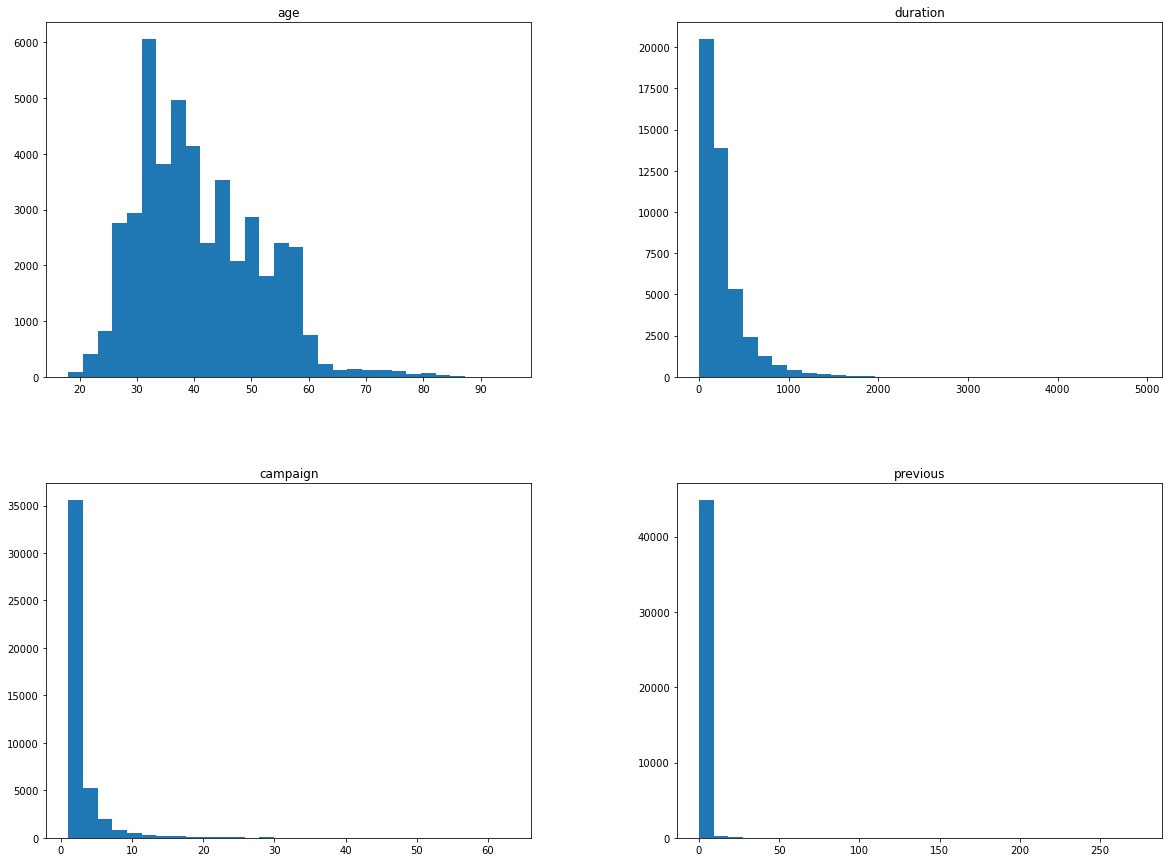

<Figure size 432x288 with 0 Axes>

In [25]:
# Data visualisation of data for better understanding
data[['age','duration','campaign','previous']].hist(bins=30, figsize=(20,15),grid = False)
plt.show()
plt.savefig("attribute_histogram_plots")

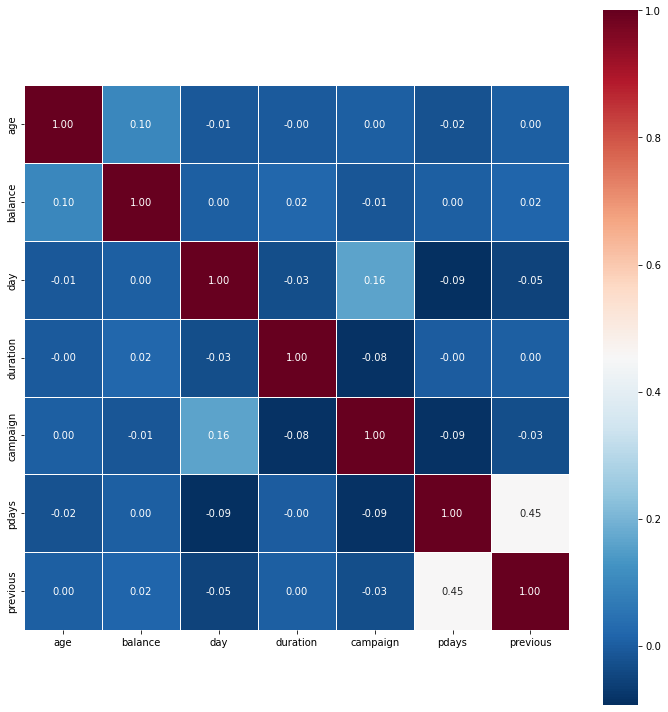

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data._get_numeric_data().astype(float).corr(),square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

In [71]:
category_features = df.select_dtypes(include=['object', 'bool']).columns.values
for col in category_features:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 3 values):
 ['divorced' 'married' 'single']
education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown']
default ( 2 values):
 ['no' 'yes']
housing ( 2 values):
 ['no' 'yes']
loan ( 2 values):
 ['no' 'yes']
contact ( 3 values):
 ['cellular' 'telephone' 'unknown']
month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome ( 4 values):
 ['failure' 'other' 'success' 'unknown']
y ( 2 values):
 ['no' 'yes']


In [72]:
for col in category_features:
    print(f"\033[1m\033[94m{col} \n{20 * '-'}\033[0m")    
    print(df[col].value_counts(), "\n")
    
print(df.nunique(axis=1))

job 
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
--------------------
no     44396
yes      815
Name: default, dtype: int64 

housing 
--------------------
yes    25130
no     20081
Name: housing, dtype: int64 

loan 
--------------------
no     37967
yes     7244
Name: loan, dtype: int64 

contact 
--------------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month 
--------------------
may    13766
jul     6895
aug    

# 4. Data visualisation and analysis

## 4.1 Data Distribution

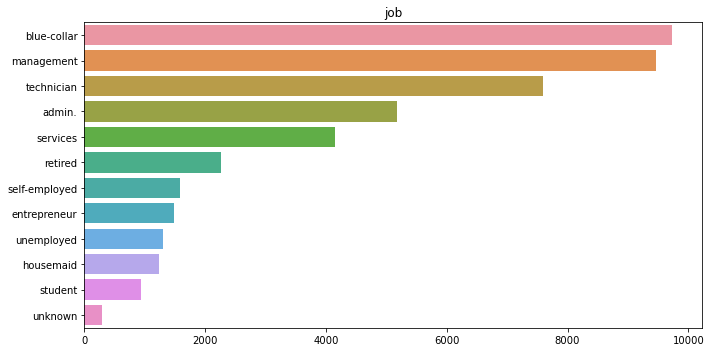

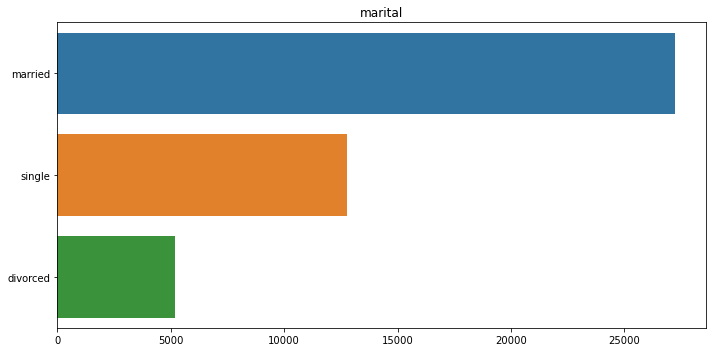

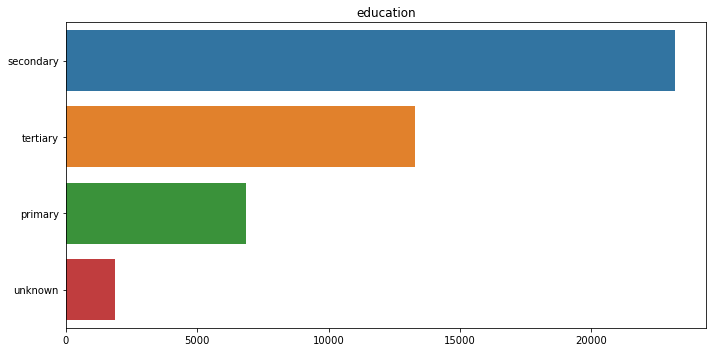

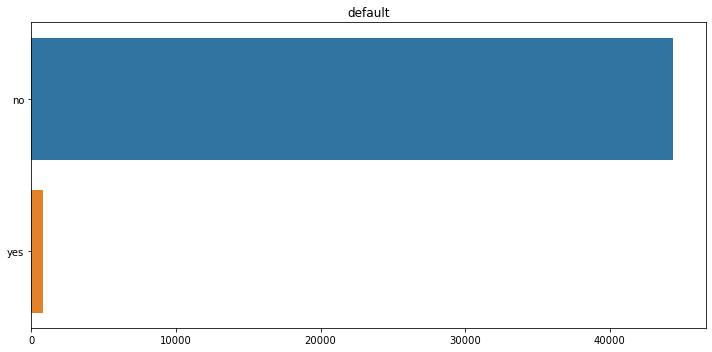

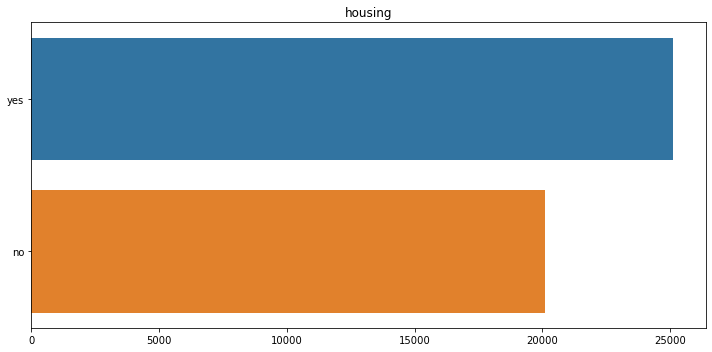

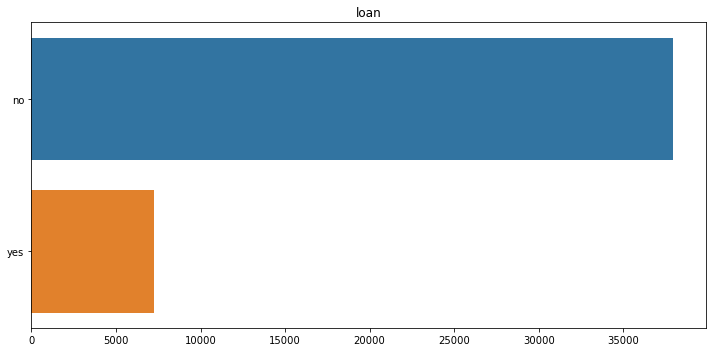

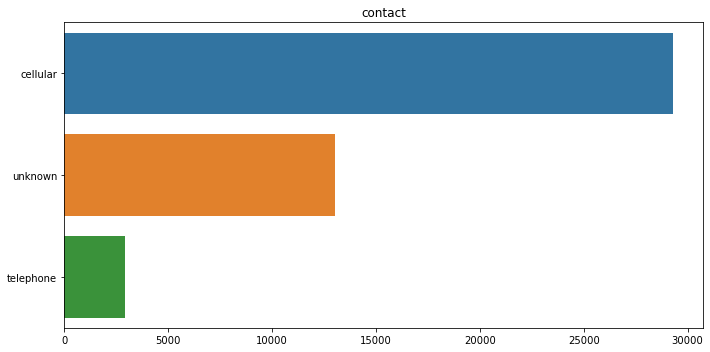

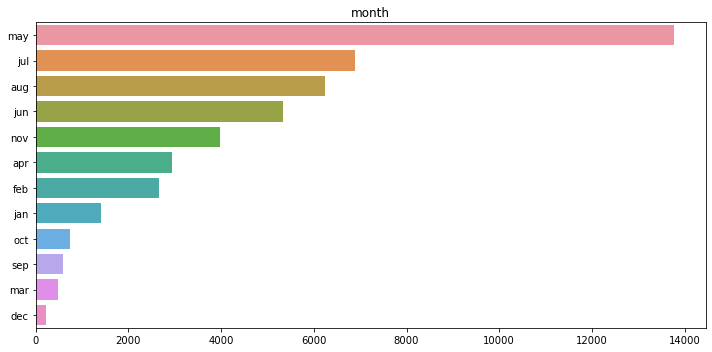

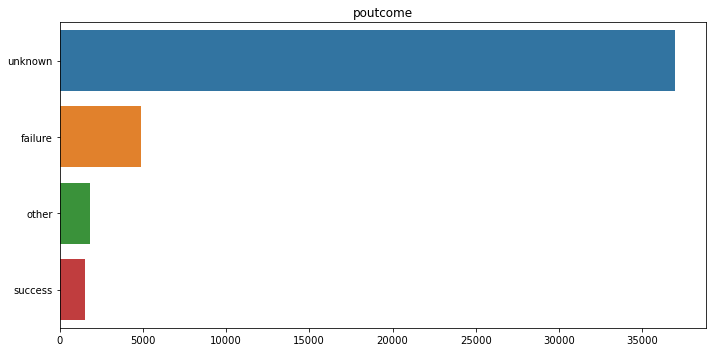

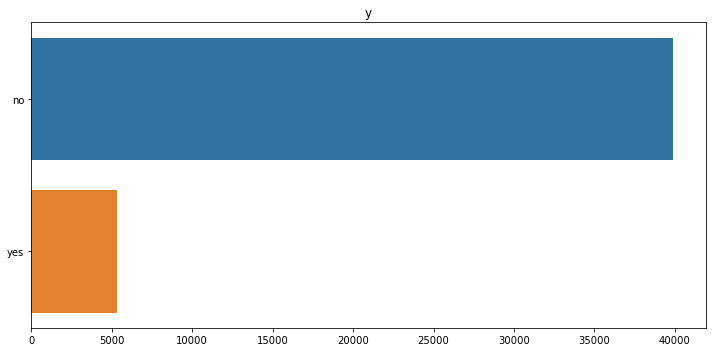

In [73]:
for col in category_features:
    plt.figure(figsize=(10,5))    
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index, data=data)    
    plt.title(col)    
    plt.tight_layout()

### Our observations:

1. Job: The audiences of these campaigns target mostly administrators, blue-collars, and technicians.
2. Marital status: Most of them are married; married clients are twice as single people.
3. Education: Most clients have university education level while illiterate people are very less.
4. default/credit: Most people have no default stay on their credit file.
5. housing: Most people have no housing loan.
6. loan: Most people have no personal loan.
7. contact: Common means of communication are cellular.
8. month - May is the busy month and December is the least busy month (because of the holidays season).
9. day of week: Thursday is the most busy day while Friday is the least busy day of the week.

## 4.2 Distribution of subscription 

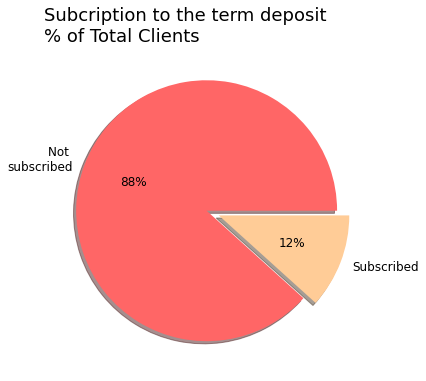

In [86]:
colors = ['#ff6666', '#ffcc97']

plt.figure(figsize=(6,6))
plt.title('Subcription to the term deposit\n% of Total Clients',loc='left',color = 'black',fontsize = '18')
plt.pie(x = data['y'].value_counts(),labels=["Not \nsubscribed", "Subscribed"],autopct='%1.0f%%',explode =(0,0.1),textprops = dict(color ="black", size=12),shadow=True,colors=colors)
plt.show()


# 5. Data preparation

In [33]:
# Data prepration
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [40]:
data.drop(['contact', 'day', 'month', 'duration','campaign', 'pdays', 'previous', 'poutcome'],axis = 1,inplace = True)
data.head()

,age,job,marital,education,default,balance,housing,loan,y
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no


In [44]:
le = LabelEncoder()
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['y'] = le.fit_transform(data['y'])
data.head()

,age,job,marital,education,default,balance,housing,loan,y
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,33,2,1,1,0,2,1,1,0
3,47,1,1,3,0,1506,1,0,0
4,33,11,2,3,0,1,0,0,0


In [45]:
data.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
y            int64
dtype: object

# 6. Model Building

In [46]:
# model building
x = data.drop('y', axis = 1)
y = data[['y']]

In [47]:
x.shape,y.shape

((45211, 8), (45211, 1))

In [48]:
# splitting the data for test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 12,shuffle=True)


In [49]:
x_train.shape,y_train.shape # training sample

((36168, 8), (36168, 1))

In [50]:
x_test.shape,y_test.shape # test sample

((9043, 8), (9043, 1))

# 7. Model Training

In [51]:
# Model training
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [52]:
# the following sows the coeffiecients of the model.
logistic_model.coef_

array([[-1.54478690e-02, -9.23089839e-03, -4.34345373e-02,
        -1.23128163e-02, -8.81083173e-02,  2.74256079e-05,
        -1.12775528e+00, -5.78385278e-01]])

In [53]:
logistic_model.intercept_

array([-0.70551343])

# 8. Model Testing | 9. Model Evaluation

In [54]:
# model testing | model evaluation for train data
y_pred_train = logistic_model.predict(x_train)

In [56]:
accuracy_score(y_train,y_pred_train)

0.8826034063260341

In [58]:
# model testing | model evaluation for train data
y_pred_test = logistic_model.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.8838880902355413

## The model works with 88% accuracy for both training and test data. 